<a href="https://colab.research.google.com/github/wjtopp3/CIS-210/blob/main/CIS_210_U4_Lab_4_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The diamonds dataset contains the price, cut, color, and other characteristics of a sample of nearly 54,000 diamonds. This data can be used to predict the price of a diamond based on its characteristics. Using a sample of the dataset and scikit-learn's LinearRegression() function, predict the price of a diamond from the user-input features. Using scikit-learn and matplotlib, create plots to evaluate the regression model.

Initialize and fit a multiple linear regression model.
Use the model to predict the prices of instances in X.
Compute the prediction errors.
Plot prediction errors vs predicted values. Label the x-axis as 'Predicted' and the y-axis as 'Prediction error'. Include a dashed line at y=0.
Generate a partial dependence display for both input features.

**Ex: If the input features are:**

carat

table

**The output should be:**

Several graphs seen in ZyBooks

MAE: 929.628

Plots are saved to the Files pane after running the code.

carat
table


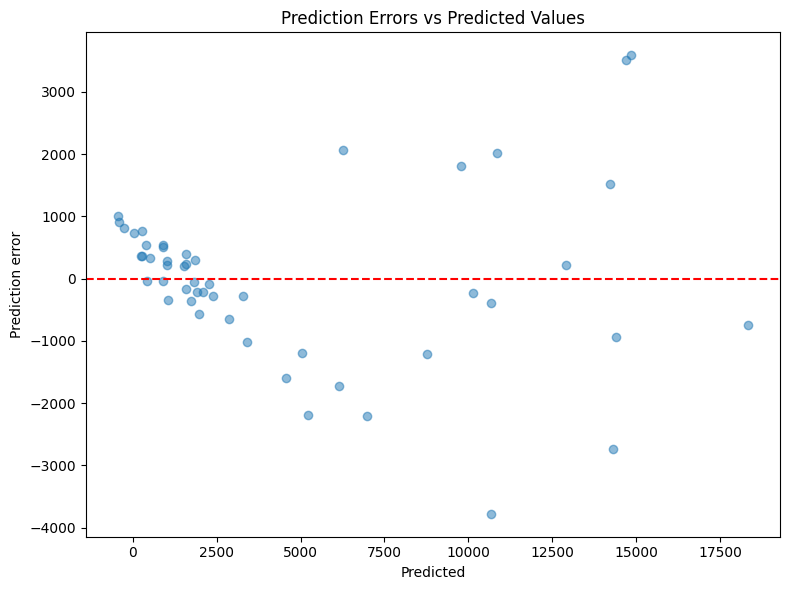

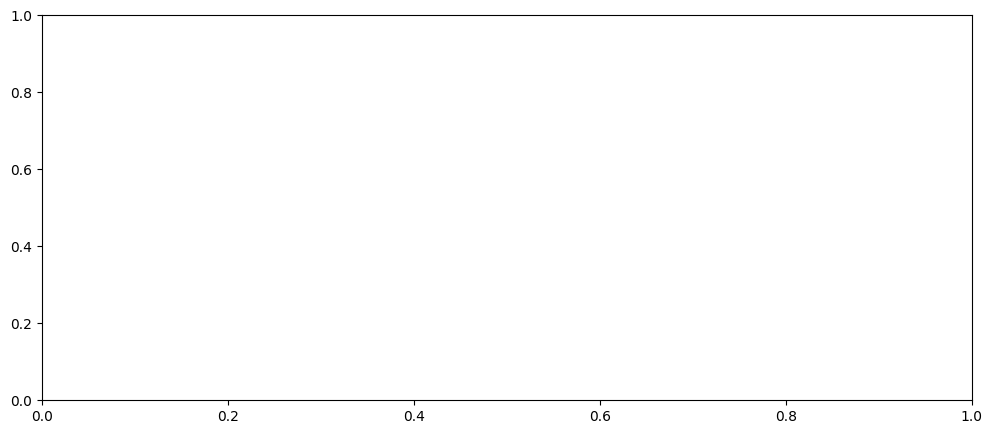

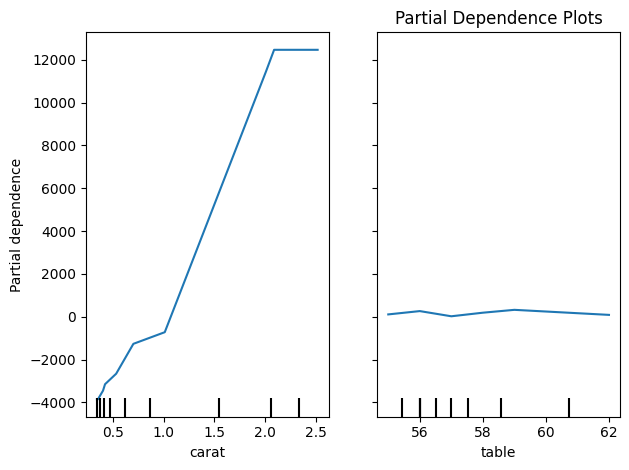

MAE: 929.628


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.inspection import PartialDependenceDisplay
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split

# Load the diamonds dataset
try:
    import seaborn as sns
    df = sns.load_dataset('diamonds')
except:
    # Alternative: if you have the dataset as a CSV file
    df = pd.read_csv('diamonds.csv')

# Read the diamonds dataset
#df = pd.read_csv('diamonds.csv')

# Get user-input features
feature1 = input()
feature2 = input()

# Take a sample of the data (using a fixed sample for consistency)
df_sample = df.sample(n=50, random_state=42)

# Prepare features (X) and target (y)
X = df_sample[[feature1, feature2]]
y = df_sample['price']

# Initialize and fit multiple linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict prices
y_pred = model.predict(X)

# Compute prediction errors
errors = y - y_pred

# Plot prediction errors vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, errors, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted')
plt.ylabel('Prediction error')
plt.title('Prediction Errors vs Predicted Values')
plt.tight_layout()
plt.show()

# Generate partial dependence display for both input features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Fit a model
model = GradientBoostingRegressor(random_state=42)
model.fit(X_train, y_train)

# Step 3: Generate Partial Dependence Plots
features = [0, 1]  # Indices of features to plot
fig, ax = plt.subplots(figsize=(12, 5))
PartialDependenceDisplay.from_estimator(model, X_test, features=features)
plt.title('Partial Dependence Plots')
plt.tight_layout()
plt.show()

# Calculate and print MAE
mae = mean_absolute_error(y, y_pred)
print(f"MAE: {mae:.3f}")